# Random Phase Interference

0.9446201630234122


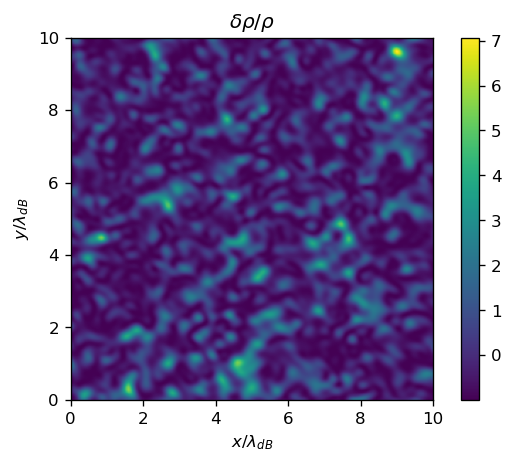

In [2]:
def RandomPhase(resolution, number_modes, debroglie_length, box_size):
    import numpy as np
    N_steps = resolution # spacial slices in one direction
    L_dB = debroglie_length
    x_max = box_size * L_dB # in number of de Broglie wavelengths
    N_modes = number_modes # number of k modes
    
    k_0 = 2*np.pi/L_dB
    
    x_min = 0
    y_min = x_min
    y_max = x_max
    x = np.linspace(x_min, x_max, N_steps)
    y = np.linspace(y_min, y_max, N_steps) # transpose
    X,Y = np.meshgrid(x,y)
    # add up unit plane waves  

    A = np.array((x,y))
    k_vals = np.random.normal(loc=0.0, scale=k_0, size=(N_modes))
#         k_vals = np.linspace(0, 2*k_0, N_modes)
    k_vectors = np.zeros((2,N_modes)) # [spacial component, k mode index]
    thetas = np.zeros((N_modes), dtype=float) # [field index, k mode index]
    psi = np.zeros((N_steps, N_steps), dtype=complex)
    n = 0 # nth mode
    for q in k_vals: # plane wave in each field for each k value
        k_angle = np.random.uniform(0,2*np.pi) #np.random.uniform(-np.pi,np.pi) # angle of k vector
        k_vectors[:, n] = [q*np.cos(k_angle), q*np.sin(k_angle)]

        thetas[n] = np.random.uniform(0,2*np.pi)
        # psi += [np.exp(-np.linalg.norm(k_vectors,2)/k_0**2)*np.exp(1j*thetas[n])*np.exp(1j*(k_vectors[0,n]*A[0,:] + k_vectors[1,n]*A[1,:]))] # add psi_n
        psi += np.exp(-np.linalg.norm(k_vectors, 2) / k_0 ** 2) * np.exp(1j * thetas[n]) * np.exp(1j * (k_vectors[0, n] * X + k_vectors[1, n] * Y))
#             print(thetas[j,i])
        n += 1
    return psi, np.abs(psi)**2
    
resolution = 256
number_modes = resolution
debroglie_length = 1.
box_size = 10

psi0, rho0 = RandomPhase(resolution, number_modes,  debroglie_length, box_size)


import matplotlib.pyplot as plt


# Normalize
Sum = np.sum(rho0)
psi0 /= np.sqrt(Sum)
rho0 /= Sum
delta = rho0/np.average(rho0) - 1

print(np.std(rho0)/np.average(rho0))

#Plot

plt.figure(dpi=120)
plt.title(r"$\delta\rho/\rho$")
plt.imshow(delta, extent=[0, box_size/debroglie_length, 0, box_size/debroglie_length])
plt.xlabel(r"$x/\lambda_{dB}$")
plt.ylabel(r"$y/\lambda_{dB}$")
plt.colorbar()
plt.show()

# Comparing Power Spectra

In [123]:
import numpy as np

k_modes = np.loadtxt("PSkmodes_N800_g0.csv", delimiter=",")
PS_SI_minus4 = np.loadtxt("PSavg_N800_g1e-4.csv", delimiter=",")
PS_SI_minus3 = np.loadtxt("PSavg_N800_g1e-3.csv", delimiter=",")
PS_SI_5minus3 = np.loadtxt("PSavg_N800_g5e-3.csv", delimiter=",")
PS_SI_minus2 = np.loadtxt("PSavg_N800_g1e-2.csv", delimiter=",")
PS_SI_3minus2 = np.loadtxt("PSavg_N800_g3e-2.csv", delimiter=",")
PS_no_SI = np.loadtxt("PSavg_N800_g0.csv", delimiter=",")

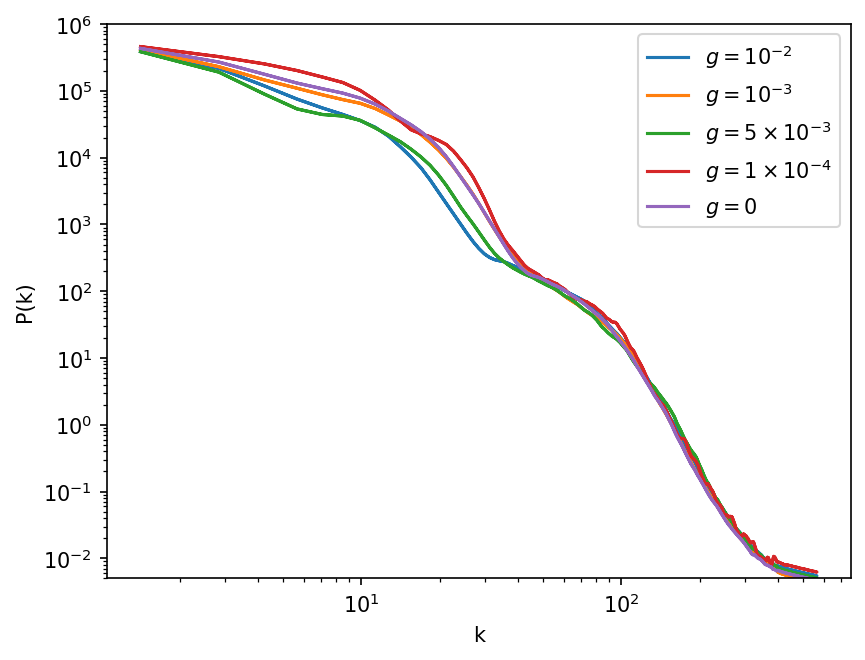

In [128]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.xlabel("k")
plt.ylabel("P(k)")
# plt.loglog(k_modes, PS_SI_3minus2, label =r"$g=3\times10^{-2}$")
plt.loglog(k_modes, PS_SI_minus2, label =r"$g=10^{-2}$")
plt.loglog(k_modes, PS_SI_minus3, label =r"$g=10^{-3}$")
plt.loglog(k_modes, PS_SI_5minus3, label =r"$g=5\times10^{-3}$")
plt.loglog(k_modes, PS_SI_minus4, label =r"$g=1\times10^{-4}$")
plt.loglog(k_modes, PS_no_SI, label =r"$g=0$")
plt.legend()
# plt.axvline(x=40)
# plt.axvline(x=150)
plt.ylim(5e-3,1e6 )
plt.show()

## Extracting k for no SI

In [113]:
from scipy.optimize import curve_fit

i1 = 40
i2 = 170

def Gauss(k, A, k0):
    return A*np.exp(-k**2 / k0**2)

popt, pcov = curve_fit(Gauss, k_modes[i1:i2], PS_no_SI[i1:i2], [100, 50])


print(popt)

A = popt[0]
k0 = popt[1]

print(1/k0)

[285.678642    59.45781787]
0.016818646155515062


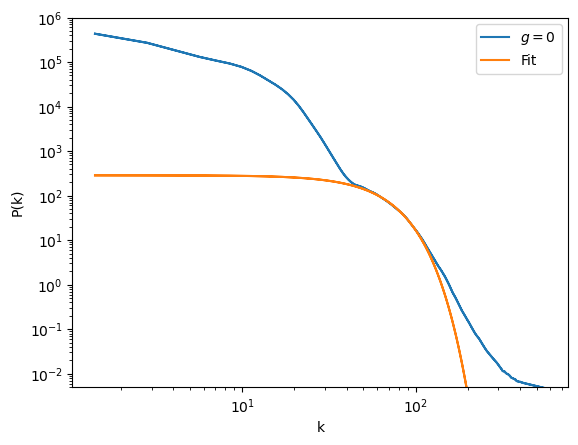

In [114]:
plt.figure(dpi=100)
plt.xlabel("k")
plt.ylabel("P(k)")
# plt.loglog(k_modes, PS_SI_minus3, label =r"$g=10^{-3}$")
# plt.loglog(k_modes, PS_SI_minus2, label =r"$g=10^{-2}$")
plt.loglog(k_modes, PS_no_SI, label =r"$g=0$")
plt.loglog(k_modes, Gauss(k_modes, A, k0), label =r"Fit")
plt.legend()
# plt.axvline(x=index)
plt.ylim(5e-3,1e6 )
plt.show()

## Extracting k for $g=3\times10^{-2}$

In [115]:
from scipy.optimize import curve_fit


def Gauss(k, A, k0):
    return A*np.exp(-k**2 / k0**2)

popt, pcov = curve_fit(Gauss, k_modes[i1:i2], PS_SI_3minus2[i1:i2], [100, 50])


print(popt)

A = popt[0]
k0 = popt[1]

print(1/k0)

[113.29341929  86.94349085]
0.011501723593003579


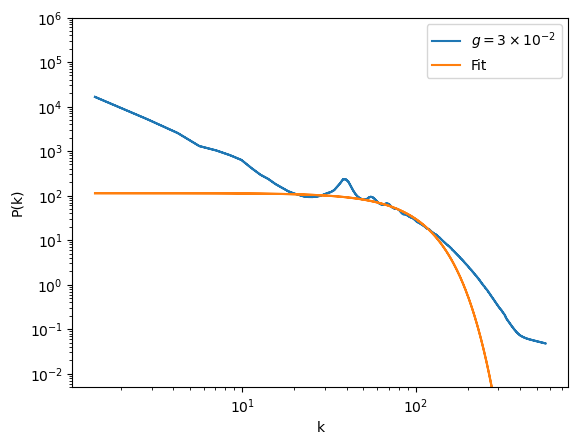

In [116]:
plt.figure(dpi=100)
plt.xlabel("k")
plt.ylabel("P(k)")
# plt.loglog(k_modes, PS_SI_minus3, label =r"$g=10^{-3}$")
plt.loglog(k_modes, PS_SI_3minus2, label =r"$g=3\times10^{-2}$")
plt.loglog(k_modes, Gauss(k_modes, A, k0), label =r"Fit")
plt.legend()
# plt.axvline(x=k0)
plt.ylim(5e-3,1e6 )
plt.show()

## Extracting k for $g=10^{-2}$

In [117]:
from scipy.optimize import curve_fit


def Gauss(k, A, k0):
    return A*np.exp(-k**2 / k0**2)

popt, pcov = curve_fit(Gauss, k_modes[i1:i2], PS_SI_minus2[i1:i2], [100, 50])


print(popt)

A = popt[0]
k0 = popt[1]

print(1/k0)

[270.24413158  61.53774011]
0.016250190505554023


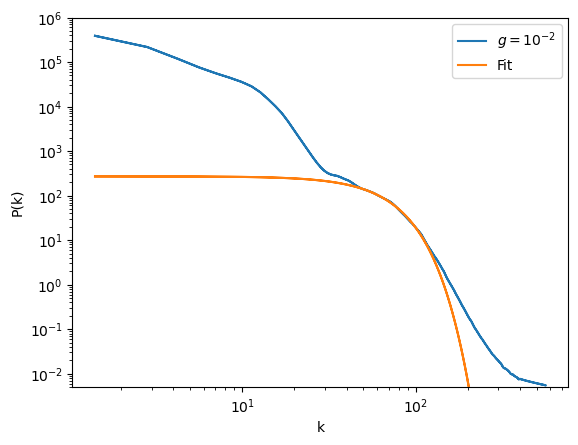

In [118]:
plt.figure(dpi=100)
plt.xlabel("k")
plt.ylabel("P(k)")
# plt.loglog(k_modes, PS_SI_minus3, label =r"$g=10^{-3}$")
plt.loglog(k_modes, PS_SI_minus2, label =r"$g=10^{-2}$")
plt.loglog(k_modes, Gauss(k_modes, A, k0), label =r"Fit")
plt.legend()
# plt.axvline(x=k0)
plt.ylim(5e-3,1e6 )
plt.show()

## Extracting k for $g=5\times10^{-3}$

In [119]:
def Gauss(k, A, k0):
    return A*np.exp(-k**2 / k0**2)

popt, pcov = curve_fit(Gauss, k_modes[i1:i2], PS_SI_5minus3[i1:i2], [100, 50])


print(popt)

A = popt[0]
k0 = popt[1]

print(1/k0)

[235.35895323  59.78012149]
0.01672796867965169


## Extracting k for $g=10^{-3}$

In [120]:
def Gauss(k, A, k0):
    return A*np.exp(-k**2 / k0**2)

popt, pcov = curve_fit(Gauss, k_modes[i1:i2], PS_SI_minus3[i1:i2], [100, 50])


print(popt)

A = popt[0]
k0 = popt[1]

print(1/k0)

[202.16668165  63.6259776 ]
0.015716850848141176


## $g=10^{-4}$

In [126]:
popt, pcov = curve_fit(Gauss, k_modes[i1:i2], PS_SI_minus4[i1:i2], [100, 50])


print(popt)

A = popt[0]
k0 = popt[1]

print(1/k0)

[239.1783625   65.84985749]
0.015186061717388377


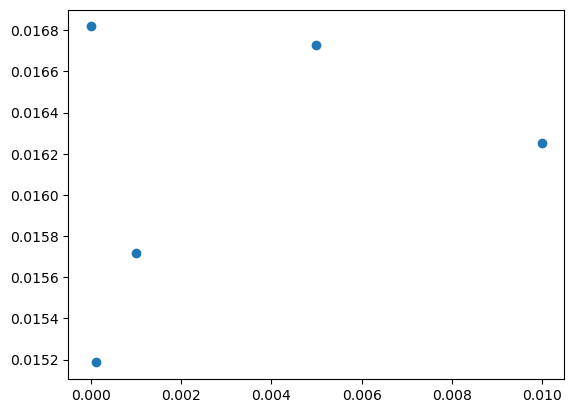

In [127]:
plt.figure()
plt.scatter([0 , 1e-4, 1e-3, 5e-3, 1e-2] , [0.016818647835176788 ,.015186061717388377,  0.015716850848141176, 0.01672796867965169, 0.016250194726675087])
plt.show()